In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-05-21 18:25:21.131727: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 18:25:21.171740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 18:25:21.794813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [4]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [5]:
path = directory_path / 'experiment'/ 'experiment2'/'kosasa'/'1.wav'

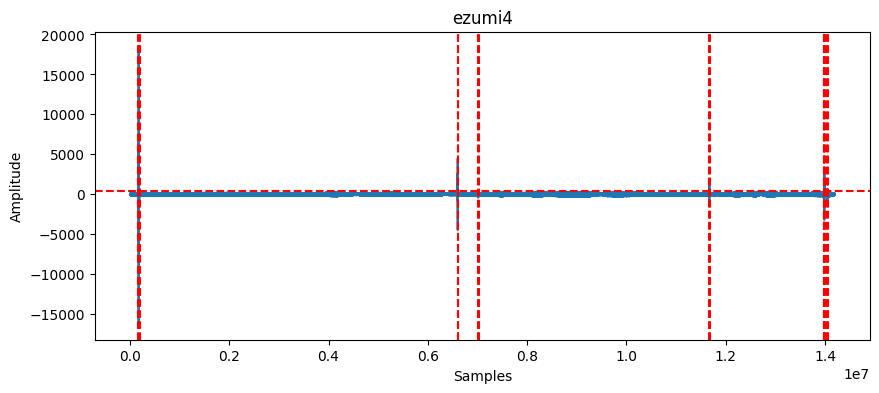

[161101, 6601898, 7014157, 11670944, 13973416, 13987072, 14046264]
[194353, 6613877, 7022736, 11679607, 13981644, 13998645, 14059594]


In [8]:
wav1 = long_audio.Long_audio(path, threshold = 0.02)
# ezumi 0.036
# soichiro 0.01
# haruki 0.02
# ibuki 0.01 (4だけ0.03)
# hikaru 0.02
# kazuki 0.02
# tsuji 0.02 (1だけ0.036)
# nakaryo 0.02
# kosasa 0.01 (4は0.015と5は0.02)
# kishimoto 0.02 (2は0.064，4と5は0.05)
# kanata 0.05 (1,3,5は0.2)
# ruku 0.03
# shibata 0.02(3は0.03)
# mocchiは0.05 

wav1.plot("ezumi4")
print(wav1.start_idxs)
print(wav1.end_idxs)

In [9]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '20240513_binary_model_best_all.keras'
wav1.predict(model_path, 2)

2024-05-21 18:27:28.104125: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21897 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


(7, 224, 224, 3)


2024-05-21 18:27:33.359199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-05-21 18:27:33.539433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 2s 2s/step
Predicted classes: [0 0 1 0 1 0 1]


In [10]:
print(len(wav1.swallowing_start_idxs))
start_array = wav1.swallowing_start_idxs/44100
end_array = wav1.swallowing_end_idxs/44100

4


In [11]:
start_list = list(start_array)
end_list = list(end_array)
print(start_list)
print(end_list)

[3.653083900226757, 149.70290249433106, 264.6472562358277, 317.16716553287984]
[4.4070975056689345, 149.9745351473923, 264.84369614512474, 317.4295918367347]


In [733]:
wav1.save_plots_to_pdf('kosasa1.pdf')

## ここまでは必ずやる
やっていることは  
import  
どのwavファイルを解析するか指定  
wavファイルをデータセットにしウェーブレット変換  
変換したものを学習  

In [32]:
sections = np.arange(0, 361, 120)
counts, _ = np.histogram(start_array, bins=sections)

print("Sections:", sections)
print("Counts in each section:", counts)
print(start_array)

Sections: [  0 120 240 360]
Counts in each section: [2 4 2]
[  6.17929705  21.29680272 149.59349206 151.81181406 183.65630385
 190.37732426 307.60938776 310.56385488]


In [ ]:
# 各セクションでの嚥下時間の合計と平均を計算するためのリスト
total_durations = []
mean_durations = []

# sections = np.arange(900, 1141, 120)
# sections = np.arange(960, 1201, 120)
# sections = np.arange(900, 1201, 300)

# セクションごとに処理
for i in range(len(sections) - 1):
    # セクション内での嚥下の開始と終了時間を抽出
    mask = (start_array >= sections[i]) & (start_array < sections[i + 1])    
    section_start_times = start_array[mask]
    section_end_times = end_array[mask]
    
    # 嚥下時間の計算
    swallow_durations = section_end_times - section_start_times
    
    # 嚥下時間の合計と平均の計算
    total_duration = np.sum(swallow_durations)
    mean_duration = np.mean(swallow_durations) if swallow_durations.size > 0 else 0  # 嚥下がない場合は平均を0とする
    
    # 結果をリストに追加
    total_durations.append(total_duration)
    mean_durations.append(mean_duration)
    
    # 結果の表示
    print(f"Section from {sections[i]} to {sections[i + 1]} seconds:")
    print(f"  Total swallowing duration: {total_duration} seconds")
    print(f"  Mean swallowing duration: {mean_duration:.2f} seconds\n")

In [ ]:
wav1.save_png_swallowing_number_line('shibata_1.png')
wav1.display_HTML('shibata_1.png')

### wavファイルの嚥下と識別された部分を図示

In [ ]:
# wav1.plot_predicted("lemon_washino_5min.wav")
wav1.plot_predicted("osawa_1")

### 嚥下回数を前後30秒の計60秒で何回しているか図示

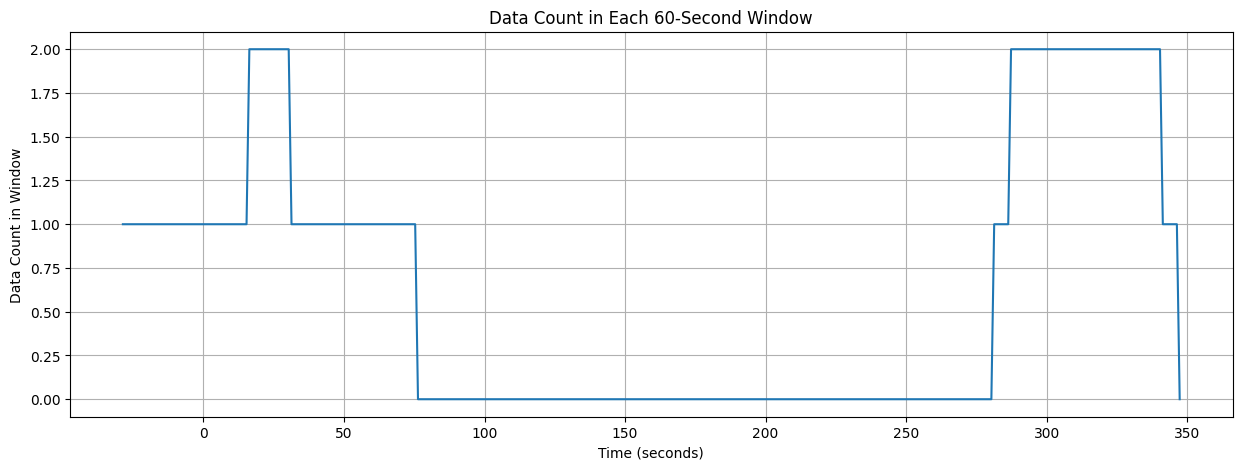

In [24]:
wav1.plot_swallowing_count(window_size = 30, interval = 1)

### 唾液推定に必要な数字を算出
wavファイル内の嚥下回数  
ある範囲の回数を認識
リスト形式でプリント
嚥下の時間を算出

In [574]:
time = end_array - start_array
print(list(time))
print((np.mean(time)))
print(np.sum(time))

[0.5736961451247167, 0.4901587301587327, 0.1891836734693868, 0.285124716553284, 0.1906122448979488, 0.48433106575964757, 0.1873015873015902, 0.4541043083900149, 0.6756009070294908]
0.39223481985386804
3.5301133786848125


### wavファイルの波形と嚥下タイミングを描画